In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.k_nearest as knn
import Functions.average_img as avg

#load data
train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)
val_arr = dat.load_val_arr()
precise_val_arr = dat.load_precise_val_arr()
val_arr_index = dat.load_val_arr_index()


In [40]:
def avg_list_creation(dat):
    '''
    returns list of average intensities for digit 0 to 10 in 1D arrays 
    
    '''
    avg_list = []
    for digit in range(0,10):

        list_digit = []
        for i in range(0, dat.shape[0]):
            if dat[i, 0] == digit:
                list_digit.append(i)

        avg = np.zeros((1,784))
    
        for j in range(0, len(list_digit)):
            avg += dat[list_digit[j], 1:]
        avg /= len(list_digit)
        avg_list.append(avg)
    return avg_list
    


In [43]:
for i in range(0,10):
    avg_list = avg_list_creation(train_array)
    df = pd.DataFrame(avg_list[i])

    df.to_csv(f'data/avg/avg_{i}.csv', index=None, header=None)

In [4]:
def load_avg_list():
    avg_list = []
    for i in range(0, 10):
        avg_df = pd.read_csv(f'data/avg/avg_{i}.csv', header=None)
        avg_arr = avg_df.to_numpy()
        avg_list.append(avg_arr)
    return avg_list


In [7]:
avg_list = load_avg_list()
avg_list

[array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16106703e-02,
         4.27148405e-02, 1.75586696e-02, 0.00000000e+00, 1.51950025e-02,
         4.15330069e-02, 1.97535033e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000

In [16]:
avg.avg_digit_img(train_array, 1)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.62770691e-02, 7.53485613e-02,
        1.05309997e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [4]:
def avg_validation(function, array, sample_size):
    true = 0
    false = 0

    for i in range(0, sample_size):
        result = function(array, i)
        if result == array[i, 0]:
            true += 1
        else:
            false +=1
    
    return print(f'Anzahl richtig erkannter Digits: {true} \n\
    Anzahl falsch erkannter Digits: {false} \n\
    Richtig: {true/sample_size*100} Prozent')

In [2]:
avg.mean_pred_weighted(train_array, )

0

In [2]:
avg.avg_validation(avg.mean_pred, test_array, 10000)

Anzahl richtig erkannter Digits: 6685 
    Anzahl falsch erkannter Digits: 3315 
    Richtig: 66.85 Prozent


In [6]:
avg_validation(avg.mean_pred_weighted, test_array, 10000)

Anzahl richtig erkannter Digits: 7207 
    Anzahl falsch erkannter Digits: 2793 
    Richtig: 72.07000000000001 Prozent


In [9]:
df = pd.DataFrame(avg_list)

df.to_csv('data/avg_list.csv', index=None, header=None)

ValueError: Must pass 2-d input. shape=(10, 1, 784)

In [24]:
avg.mean_pred_weighted(test_array, 2)

1

In [10]:
#show image 
def show_digit(sample):
    img = test_array[sample-1, 1:]
    img.shape = (28,28)
    plt.imshow(img, 'gray')

In [3]:
#compute average intensities of all rows describing the same number
#imshow as output
def avg_digit_img(dat, digit):

    #create list with rowindex for given digit
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    #create np array filled with zeros in shape flat image
    avg = np.zeros((1,784))
    
    #sum up intensities from all selected images for every pixel
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]
    #shape image
    avg.shape = (28,28)
    #divide by number of selected pictures for average intensity value
    avg /= len(list_digit)

    #show image and colorbar
    plt.imshow(avg, 'gray')
    plt.colorbar()


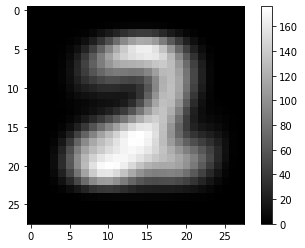

In [4]:
#use function avg_digit_img to look at average image of digit 2
avg_digit_img(train_array, 2)

In [8]:
#computes average intensities of all rows describing the same number
#returns numpy array
def avg_digit_arr(dat, digit):

    #create list with rowindex for given digit
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    #create np array filled with zeros in shape flat image
    avg = np.zeros((1,784))

    #sum up intensities from all selected images for every pixel
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]

    #divide by number of selected pictures for average intensity value
    avg /= len(list_digit)

    #return 1 dimensional array
    return avg

In [7]:
#use function avg_digit_arr to look at array of average image of all ones
avg_digit_arr(train_array, 1)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.62770691e-02, 7.53485613e-02,
        1.05309997e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [6]:
#compare sample image with averaged images pixel by pixel
#select digit with lowest difference in intensity (output)
def digit_recognition(sample):

    intensities_list = [] #will be filled with average intensity differences for each digit 
    sample_img = test_array[sample-1, 1:] #create array with intensity values of sample

    #subtract avg array from sample array and store as difference array (diff_arr)
    for i in range(0,10):
        diff_arr = sample_img - avg_digit_arr(train_array, i)
        
        #turn difference array to difference list
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        #sum all absolute values of difference list and assign to variable intensity_sum
        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        #append intensities_list by intensity sum
        #at the end of for loop, intensites_list contains 1 value for each of the 10 digits
        intensities_list.append(intensity_sum)

    #select smallest value and return as output
    return intensities_list.index(min(intensities_list))

1
2


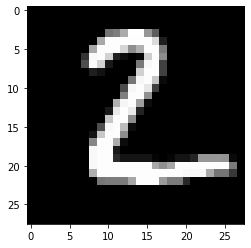

In [12]:
#try out digit_recognition function
print(digit_recognition(2))
show_digit(2)
print(test_array[1,0]) #note: here we use the index and not the number of the digit

In [10]:
#Überprüfung:
avg_list = []
for i in range(0,10):
    avg_list.append(avg_digit_arr(train_array, i))

def digit_recognition_fast(sample):
    #die geht schneller weil nicht immer die durchschnitsarrays neu berechnet werden
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:] 

    for i in range(0,10):
        diff_arr = sample_img - avg_list[i]
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        intensities_list.append(intensity_sum)

    return intensities_list.index(min(intensities_list))


true = 0
false = 0

for i in range(0, test_array.shape[0]):
    if digit_recognition_fast(i+1) == test_array[i, 0]:
        true += 1
    else:
        false += 1

print(f'Anzahl richtig erkannter Digits: {true} \n\
Anzahl falsch erkannter Digits: {false} \n\
Richtig: {true/test_array.shape[0]*100} Prozent')
#66,85 Prozent

Anzahl richtig erkannter Digits: 6684 
Anzahl falsch erkannter Digits: 3315 
Richtig: 66.84668466846685 Prozent
